In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.	Classification of XOR data (20 + 10 points)

#### 1.1 (a)	Plot the decision boundaries of the earliest network in the training process that achieves 100% accuracy by plotting the network outputs in a densely sampled region around [-0.5,1.5] x [-0.5,1.5]. (5 points)

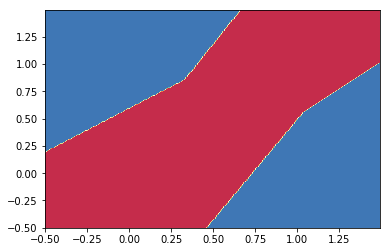

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,3)
        self.fc3 = nn.Linear(3,3)
        self.fc4 = nn.Linear(3,3)
        self.fc5 = nn.Linear(3,2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)
        


def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

    

# input values
X = np.array([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
y = np.array([0, 1, 1, 0])

# read data         
X = torch.tensor(X, dtype = torch.float)   
y = torch.tensor(y, dtype = torch.long)    

# train 
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()

nepochs = 10000
data, target = X, y

# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        #print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #print('Training accuracy is ', accuracy)

plot_decision_boundary(net, X, y)

#### 1.1 (b)	Plot the decision boundaries of a network after the cross-entropy loss falls below 1x10^(-4). (5 points)

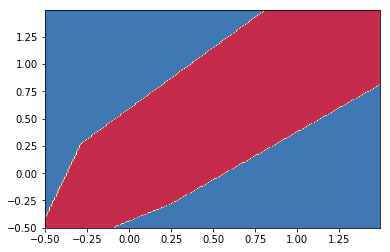

In [3]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,3)
        self.fc3 = nn.Linear(3,3)
        self.fc4 = nn.Linear(3,3)
        self.fc5 = nn.Linear(3,2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)



def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)


# input values
X = np.array([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
y = np.array([0, 1, 1, 0])

# read data         
X = torch.tensor(X, dtype = torch.float)   
y = torch.tensor(y, dtype = torch.long)    

# train 
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()

nepochs = 10000
data, target = X, y

# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        #print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #print('Training accuracy is ', accuracy)
    if loss.item() < 10^(-4):
        break   


plot_decision_boundary(net, X, y)

#### 1.2 Gradually decrease the capacity of the network above.  Find the smallest network that can still separate the data.

#### 1.2 (a)	What are the number of hidden layers and neurons of the smallest network that still can separate the data? (5 points)

Hidden layers of the smallest network: 2

number of neurons of the smallest network: 2

Epoch  0 Loss  0.7004944086074829
Training accuracy is  0.5
Epoch  10 Loss  0.6977705955505371
Training accuracy is  0.5
Epoch  20 Loss  0.6948106288909912
Training accuracy is  0.5
Epoch  30 Loss  0.6936300992965698
Training accuracy is  0.5
Epoch  40 Loss  0.6933964490890503
Training accuracy is  0.5
Epoch  50 Loss  0.6933751106262207
Training accuracy is  0.5
Epoch  60 Loss  0.6933529376983643
Training accuracy is  0.5
Epoch  70 Loss  0.6933220028877258
Training accuracy is  0.5
Epoch  80 Loss  0.6932957172393799
Training accuracy is  0.5
Epoch  90 Loss  0.6932758688926697
Training accuracy is  0.5
Epoch  100 Loss  0.6932597756385803
Training accuracy is  0.5
Epoch  110 Loss  0.6932457685470581
Training accuracy is  0.5
Epoch  120 Loss  0.6932333707809448
Training accuracy is  0.5
Epoch  130 Loss  0.6932224035263062
Training accuracy is  0.5
Epoch  140 Loss  0.6932126879692078
Training accuracy is  0.5
Epoch  150 Loss  0.6932039856910706
Training accuracy is  0.5
Epoch  160 Loss  0.

Epoch  1410 Loss  0.01713644526898861
Training accuracy is  1.0
Epoch  1420 Loss  0.016719579696655273
Training accuracy is  1.0
Epoch  1430 Loss  0.016310814768075943
Training accuracy is  1.0
Epoch  1440 Loss  0.015930593013763428
Training accuracy is  1.0
Epoch  1450 Loss  0.015576733276247978
Training accuracy is  1.0
Epoch  1460 Loss  0.0152201596647501
Training accuracy is  1.0
Epoch  1470 Loss  0.014889871701598167
Training accuracy is  1.0
Epoch  1480 Loss  0.014573548920452595
Training accuracy is  1.0
Epoch  1490 Loss  0.014256680384278297
Training accuracy is  1.0
Epoch  1500 Loss  0.013951430097222328
Training accuracy is  1.0
Epoch  1510 Loss  0.01369971502572298
Training accuracy is  1.0
Epoch  1520 Loss  0.013408799655735493
Training accuracy is  1.0
Epoch  1530 Loss  0.013132346794009209
Training accuracy is  1.0
Epoch  1540 Loss  0.012904522940516472
Training accuracy is  1.0
Epoch  1550 Loss  0.012624719180166721
Training accuracy is  1.0
Epoch  1560 Loss  0.012389803

Epoch  2760 Loss  0.003286688821390271
Training accuracy is  1.0
Epoch  2770 Loss  0.0032608313485980034
Training accuracy is  1.0
Epoch  2780 Loss  0.0032388875260949135
Training accuracy is  1.0
Epoch  2790 Loss  0.0032122652046382427
Training accuracy is  1.0
Epoch  2800 Loss  0.0031879788730293512
Training accuracy is  1.0
Epoch  2810 Loss  0.0031637498177587986
Training accuracy is  1.0
Epoch  2820 Loss  0.003140204818919301
Training accuracy is  1.0
Epoch  2830 Loss  0.0031183557584881783
Training accuracy is  1.0
Epoch  2840 Loss  0.0030938514973968267
Training accuracy is  1.0
Epoch  2850 Loss  0.003070955164730549
Training accuracy is  1.0
Epoch  2860 Loss  0.0030478781554847956
Training accuracy is  1.0
Epoch  2870 Loss  0.003025455167517066
Training accuracy is  1.0
Epoch  2880 Loss  0.003005712293088436
Training accuracy is  1.0
Epoch  2890 Loss  0.0029816455207765102
Training accuracy is  1.0
Epoch  2900 Loss  0.0029604672454297543
Training accuracy is  1.0
Epoch  2910 Los

Epoch  4100 Loss  0.0013983433600515127
Training accuracy is  1.0
Epoch  4110 Loss  0.001391117344610393
Training accuracy is  1.0
Epoch  4120 Loss  0.001383861294016242
Training accuracy is  1.0
Epoch  4130 Loss  0.0013767542550340295
Training accuracy is  1.0
Epoch  4140 Loss  0.0013696765527129173
Training accuracy is  1.0
Epoch  4150 Loss  0.0013626284198835492
Training accuracy is  1.0
Epoch  4160 Loss  0.0013557297643274069
Training accuracy is  1.0
Epoch  4170 Loss  0.0013489194680005312
Training accuracy is  1.0
Epoch  4180 Loss  0.0013419309398159385
Training accuracy is  1.0
Epoch  4190 Loss  0.0013349715154618025
Training accuracy is  1.0
Epoch  4200 Loss  0.0013282799627631903
Training accuracy is  1.0
Epoch  4210 Loss  0.0013214992359280586
Training accuracy is  1.0
Epoch  4220 Loss  0.0013147777644917369
Training accuracy is  1.0
Epoch  4230 Loss  0.0013082053046673536
Training accuracy is  1.0
Epoch  4240 Loss  0.0013016025768592954
Training accuracy is  1.0
Epoch  4250 

Epoch  5430 Loss  0.0007703097653575242
Training accuracy is  1.0
Epoch  5440 Loss  0.0007673925720155239
Training accuracy is  1.0
Epoch  5450 Loss  0.00076453504152596
Training accuracy is  1.0
Epoch  5460 Loss  0.0007615284412167966
Training accuracy is  1.0
Epoch  5470 Loss  0.0007587005384266376
Training accuracy is  1.0
Epoch  5480 Loss  0.0007557832868769765
Training accuracy is  1.0
Epoch  5490 Loss  0.0007528660353273153
Training accuracy is  1.0
Epoch  5500 Loss  0.00074997846968472
Training accuracy is  1.0
Epoch  5510 Loss  0.0007471504504792392
Training accuracy is  1.0
Epoch  5520 Loss  0.0007442926871590316
Training accuracy is  1.0
Epoch  5530 Loss  0.0007414944702759385
Training accuracy is  1.0
Epoch  5540 Loss  0.0007386961369775236
Training accuracy is  1.0
Epoch  5550 Loss  0.0007358978618867695
Training accuracy is  1.0
Epoch  5560 Loss  0.00073315913323313
Training accuracy is  1.0
Epoch  5570 Loss  0.0007303905440494418
Training accuracy is  1.0
Epoch  5580 Loss

Epoch  6820 Loss  0.00048269107355736196
Training accuracy is  1.0
Epoch  6830 Loss  0.0004812913539353758
Training accuracy is  1.0
Epoch  6840 Loss  0.0004798916634172201
Training accuracy is  1.0
Epoch  6850 Loss  0.0004784323391504586
Training accuracy is  1.0
Epoch  6860 Loss  0.0004770326195284724
Training accuracy is  1.0
Epoch  6870 Loss  0.00047566270222887397
Training accuracy is  1.0
Epoch  6880 Loss  0.0004742927267216146
Training accuracy is  1.0
Epoch  6890 Loss  0.0004729227803181857
Training accuracy is  1.0
Epoch  6900 Loss  0.0004715528339147568
Training accuracy is  1.0
Epoch  6910 Loss  0.00047018288751132786
Training accuracy is  1.0
Epoch  6920 Loss  0.0004688427143264562
Training accuracy is  1.0
Epoch  6930 Loss  0.00046750257024541497
Training accuracy is  1.0
Epoch  6940 Loss  0.0004661623388528824
Training accuracy is  1.0
Epoch  6950 Loss  0.0004648221656680107
Training accuracy is  1.0
Epoch  6960 Loss  0.0004634819633793086
Training accuracy is  1.0
Epoch 

Epoch  8210 Loss  0.00033567470381967723
Training accuracy is  1.0
Epoch  8220 Loss  0.0003349002217873931
Training accuracy is  1.0
Epoch  8230 Loss  0.0003340959083288908
Training accuracy is  1.0
Epoch  8240 Loss  0.00033332142629660666
Training accuracy is  1.0
Epoch  8250 Loss  0.0003325171710457653
Training accuracy is  1.0
Epoch  8260 Loss  0.0003317426599096507
Training accuracy is  1.0
Epoch  8270 Loss  0.0003309979510959238
Training accuracy is  1.0
Epoch  8280 Loss  0.00033025327138602734
Training accuracy is  1.0
Epoch  8290 Loss  0.00032950856257230043
Training accuracy is  1.0
Epoch  8300 Loss  0.00032873405143618584
Training accuracy is  1.0
Epoch  8310 Loss  0.00032798934262245893
Training accuracy is  1.0
Epoch  8320 Loss  0.0003272446629125625
Training accuracy is  1.0
Epoch  8330 Loss  0.00032647018088027835
Training accuracy is  1.0
Epoch  8340 Loss  0.0003257552452851087
Training accuracy is  1.0
Epoch  8350 Loss  0.0003250105364713818
Training accuracy is  1.0
Epo

Epoch  9540 Loss  0.0002532760554458946
Training accuracy is  1.0
Epoch  9550 Loss  0.0002527993929106742
Training accuracy is  1.0
Epoch  9560 Loss  0.00025229292805306613
Training accuracy is  1.0
Epoch  9570 Loss  0.000251846038736403
Training accuracy is  1.0
Epoch  9580 Loss  0.0002513693762011826
Training accuracy is  1.0
Epoch  9590 Loss  0.000250862940447405
Training accuracy is  1.0
Epoch  9600 Loss  0.00025038624880835414
Training accuracy is  1.0
Epoch  9610 Loss  0.00024993938859552145
Training accuracy is  1.0
Epoch  9620 Loss  0.0002494031214155257
Training accuracy is  1.0
Epoch  9630 Loss  0.0002489264588803053
Training accuracy is  1.0
Epoch  9640 Loss  0.00024847956956364214
Training accuracy is  1.0
Epoch  9650 Loss  0.00024797310470603406
Training accuracy is  1.0
Epoch  9660 Loss  0.0002475262444932014
Training accuracy is  1.0
Epoch  9670 Loss  0.00024707935517653823
Training accuracy is  1.0
Epoch  9680 Loss  0.0002466324658598751
Training accuracy is  1.0
Epoch 

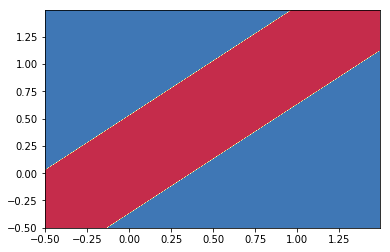

In [11]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,2)
        self.fc2 = nn.Linear(2,2)
        self.fc3 = nn.Linear(2,2)
        self.fc4 = nn.Linear(2,2)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        


def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)


    
# input values
X = np.array([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
y = np.array([0, 1, 1, 0])

# read data         
X = torch.tensor(X, dtype = torch.float)   
y = torch.tensor(y, dtype = torch.long)    

# train 
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()

nepochs = 10000
data, target = X, y

# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        
plot_decision_boundary(net, X, y)

#### 1.2 (b)	Plot the decision boundaries of the network as before, that is, right after the network achieves perfect accuracy and after the cross-entropy loss falls below 1x10-4. (5 points)

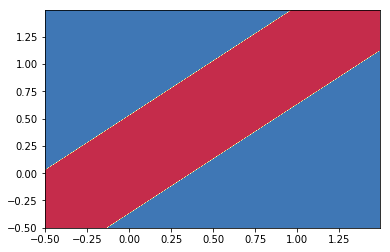

In [16]:
# decision boundaries of right after the network achieves perfect accuracy

# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        #print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #print('Training accuracy is ', accuracy)
    # if network achieves perfect accuracy, then break the loop
    if accuracy == 1.0:
        break
    
plot_decision_boundary(net, X, y)

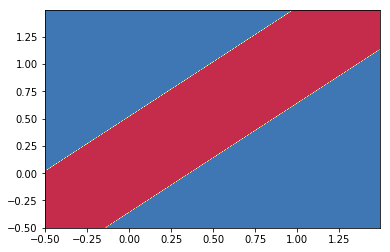

In [27]:
# decision boundaries of right after the cross-entropy loss falls below 1x10-4

# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        #print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #print('Training accuracy is ', accuracy)
    # if the cross entropy loss falls down below 10^(-4), break the for loop
    if loss.item() < 0.0001:
        break
    
plot_decision_boundary(net, X, y)

#### 1.2 (c)	Based on the decision boundaries, which network(s) do you think is/are performing better at the task, beyond its performance on the training set? (10 points)

Based on the decision boundaries, I think the smaller network is performing better at the task because it has a narrower decision boundaries so it is easier to predict.

## 2.	Classification of Separable, Synthetic data (30 + 10 points)

#### 2.1 File Feedforward_Data_ellipse.csv contains 13312 two-dimensional data points (feature values located in columns A and B) and their respective binary label (labels located in column C).  Create and train a network that separates the data.  Report your best cross-entropy and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around [-1.0,1.0] x [-1.0,1.0].  Report the number of hidden layers, type of activation function and number of neurons per layer used.  (15 points).

Best cross entropy: 0.18

Best accuracy value: 0.961

Number of hidden layers: 6

Type of activation function: Linear

Number of neurons per layer used: 70

/Users/jungmin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6933558583259583
Training accuracy is  0.44346780857937046
Epoch  10 Loss  0.6902031302452087
Training accuracy is  0.5565321914206296
Epoch  20 Loss  0.6873288154602051
Training accuracy is  0.5565321914206296
Epoch  30 Loss  0.6866788268089294
Training accuracy is  0.5565321914206296
Epoch  40 Loss  0.6867349743843079
Training accuracy is  0.5565321914206296
Epoch  50 Loss  0.6867116689682007
Training accuracy is  0.5565321914206296
Epoch  60 Loss  0.6866965889930725
Training accuracy is  0.5565321914206296
Epoch  70 Loss  0.6866545677185059
Training accuracy is  0.5565321914206296
Epoch  80 Loss  0.6866300106048584
Training accuracy is  0.5565321914206296
Epoch  90 Loss  0.6866495013237
Training accuracy is  0.5565321914206296
Epoch  100 Loss  0.6866247057914734
Training accuracy is  0.5565321914206296
Epoch  110 Loss  0.6866018176078796
Training accuracy is  0.5565321914206296
Epoch  120 Loss  0.6866041421890259
Training accuracy is  0.5565321914206296
Epoch  130 L

Epoch  1070 Loss  0.5684403777122498
Training accuracy is  0.8106077680114191
Epoch  1080 Loss  0.5161065459251404
Training accuracy is  0.835173916309819
Epoch  1090 Loss  0.44955047965049744
Training accuracy is  0.8455412816467583
Epoch  1100 Loss  0.3752749264240265
Training accuracy is  0.852678236045376
Epoch  1110 Loss  0.3087443709373474
Training accuracy is  0.86342123056119
Epoch  1120 Loss  0.25949418544769287
Training accuracy is  0.8975283600030051
Epoch  1130 Loss  0.23159444332122803
Training accuracy is  0.896551724137931
Epoch  1140 Loss  0.21766141057014465
Training accuracy is  0.8971527308241304
Epoch  1150 Loss  0.2100059986114502
Training accuracy is  0.8975283600030051
Epoch  1160 Loss  0.20566041767597198
Training accuracy is  0.8979039891818796
Epoch  1170 Loss  0.20287999510765076
Training accuracy is  0.8982044925249794
Epoch  1180 Loss  0.2009539008140564
Training accuracy is  0.8982044925249794
Epoch  1190 Loss  0.199529230594635
Training accuracy is  0.898

Epoch  2120 Loss  0.19177991151809692
Training accuracy is  0.9001577642551274
Epoch  2130 Loss  0.19034317135810852
Training accuracy is  0.8997070092404778
Epoch  2140 Loss  0.19590447843074799
Training accuracy is  0.8985049958680791
Epoch  2150 Loss  0.19172386825084686
Training accuracy is  0.8992562542258282
Epoch  2160 Loss  0.19214412569999695
Training accuracy is  0.9002328900909022
Epoch  2170 Loss  0.19294129312038422
Training accuracy is  0.9003080159266772
Epoch  2180 Loss  0.19808483123779297
Training accuracy is  0.9018105326421757
Epoch  2190 Loss  0.19394713640213013
Training accuracy is  0.9003080159266772
Epoch  2200 Loss  0.1901586949825287
Training accuracy is  0.8997821350762527
Epoch  2210 Loss  0.19265152513980865
Training accuracy is  0.8988054992111787
Epoch  2220 Loss  0.19563093781471252
Training accuracy is  0.8988806250469537
Epoch  2230 Loss  0.19223983585834503
Training accuracy is  0.9003080159266772
Epoch  2240 Loss  0.19102223217487335
Training accura

Epoch  3170 Loss  0.2048490047454834
Training accuracy is  0.9165351964540606
Epoch  3180 Loss  0.1884663701057434
Training accuracy is  0.9001577642551274
Epoch  3190 Loss  0.1902172714471817
Training accuracy is  0.899481631733153
Epoch  3200 Loss  0.18893122673034668
Training accuracy is  0.8998572609120277
Epoch  3210 Loss  0.20428979396820068
Training accuracy is  0.8985049958680791
Epoch  3220 Loss  0.18806497752666473
Training accuracy is  0.9001577642551274
Epoch  3230 Loss  0.18952961266040802
Training accuracy is  0.9003080159266772
Epoch  3240 Loss  0.18800216913223267
Training accuracy is  0.9001577642551274
Epoch  3250 Loss  0.1936427354812622
Training accuracy is  0.9134550371872887
Epoch  3260 Loss  0.18832124769687653
Training accuracy is  0.9002328900909022
Epoch  3270 Loss  0.19084323942661285
Training accuracy is  0.8992562542258282
Epoch  3280 Loss  0.19445274770259857
Training accuracy is  0.8991060025542784
Epoch  3290 Loss  0.18809683620929718
Training accuracy i

Epoch  4220 Loss  0.19681315124034882
Training accuracy is  0.8988054992111787
Epoch  4230 Loss  0.1963769942522049
Training accuracy is  0.9235218991811284
Epoch  4240 Loss  0.19158144295215607
Training accuracy is  0.899481631733153
Epoch  4250 Loss  0.18813572824001312
Training accuracy is  0.9006085192697769
Epoch  4260 Loss  0.18792875111103058
Training accuracy is  0.9000075125835775
Epoch  4270 Loss  0.19755631685256958
Training accuracy is  0.8988054992111787
Epoch  4280 Loss  0.18674905598163605
Training accuracy is  0.9002328900909022
Epoch  4290 Loss  0.18846271932125092
Training accuracy is  0.9007587709413267
Epoch  4300 Loss  0.18916934728622437
Training accuracy is  0.9011344001202013
Epoch  4310 Loss  0.19684860110282898
Training accuracy is  0.901510029299076
Epoch  4320 Loss  0.18678052723407745
Training accuracy is  0.9000826384193524
Epoch  4330 Loss  0.1888074427843094
Training accuracy is  0.8998572609120277
Epoch  4340 Loss  0.1982736438512802
Training accuracy i

Epoch  5270 Loss  0.1898081749677658
Training accuracy is  0.9197656073923822
Epoch  5280 Loss  0.18877677619457245
Training accuracy is  0.9096987453985426
Epoch  5290 Loss  0.18889570236206055
Training accuracy is  0.9122530238148899
Epoch  5300 Loss  0.18971070647239685
Training accuracy is  0.9051911952520472
Epoch  5310 Loss  0.18973493576049805
Training accuracy is  0.909323116219668
Epoch  5320 Loss  0.19100192189216614
Training accuracy is  0.9098489970700924
Epoch  5330 Loss  0.1907278299331665
Training accuracy is  0.9199158590639321
Epoch  5340 Loss  0.1898963302373886
Training accuracy is  0.9197656073923822
Epoch  5350 Loss  0.18893329799175262
Training accuracy is  0.9106753812636166
Epoch  5360 Loss  0.18695540726184845
Training accuracy is  0.9034633010292239
Epoch  5370 Loss  0.18638859689235687
Training accuracy is  0.9009090226128765
Epoch  5380 Loss  0.19143559038639069
Training accuracy is  0.9046653144016227
Epoch  5390 Loss  0.19037620723247528
Training accuracy 

Epoch  6320 Loss  0.18651869893074036
Training accuracy is  0.9006085192697769
Epoch  6330 Loss  0.1847110241651535
Training accuracy is  0.9006085192697769
Epoch  6340 Loss  0.18478086590766907
Training accuracy is  0.900533393434002
Epoch  6350 Loss  0.1839628517627716
Training accuracy is  0.900533393434002
Epoch  6360 Loss  0.1836322695016861
Training accuracy is  0.9007587709413267
Epoch  6370 Loss  0.1877930909395218
Training accuracy is  0.9078205995041695
Epoch  6380 Loss  0.19036245346069336
Training accuracy is  0.9214183757794305
Epoch  6390 Loss  0.1866462379693985
Training accuracy is  0.9013597776275261
Epoch  6400 Loss  0.18427349627017975
Training accuracy is  0.9010592742844264
Epoch  6410 Loss  0.1938285380601883
Training accuracy is  0.9096236195627676
Epoch  6420 Loss  0.18886420130729675
Training accuracy is  0.9046653144016227
Epoch  6430 Loss  0.18987612426280975
Training accuracy is  0.876042370971377
Epoch  6440 Loss  0.19005915522575378
Training accuracy is  0

Epoch  7370 Loss  0.19126731157302856
Training accuracy is  0.899556757568928
Epoch  7380 Loss  0.1871071308851242
Training accuracy is  0.924874164225077
Epoch  7390 Loss  0.1832805573940277
Training accuracy is  0.9002328900909022
Epoch  7400 Loss  0.18361443281173706
Training accuracy is  0.900458267598227
Epoch  7410 Loss  0.18809540569782257
Training accuracy is  0.902411539328375
Epoch  7420 Loss  0.19018711149692535
Training accuracy is  0.907294718653745
Epoch  7430 Loss  0.18716678023338318
Training accuracy is  0.9011344001202013
Epoch  7440 Loss  0.1972474455833435
Training accuracy is  0.9427541131395086
Epoch  7450 Loss  0.18610046803951263
Training accuracy is  0.9011344001202013
Epoch  7460 Loss  0.19026747345924377
Training accuracy is  0.9175869581549094
Epoch  7470 Loss  0.18741801381111145
Training accuracy is  0.9048155660731726
Epoch  7480 Loss  0.18800394237041473
Training accuracy is  0.9214183757794305
Epoch  7490 Loss  0.18862992525100708
Training accuracy is  

Epoch  8420 Loss  0.18696527183055878
Training accuracy is  0.9011344001202013
Epoch  8430 Loss  0.18284691870212555
Training accuracy is  0.9006836451055518
Epoch  8440 Loss  0.18585117161273956
Training accuracy is  0.9037638043723236
Epoch  8450 Loss  0.1896492838859558
Training accuracy is  0.9284050785064983
Epoch  8460 Loss  0.18684518337249756
Training accuracy is  0.9006085192697769
Epoch  8470 Loss  0.19835442304611206
Training accuracy is  0.9003831417624522
Epoch  8480 Loss  0.18198846280574799
Training accuracy is  0.9007587709413267
Epoch  8490 Loss  0.18233592808246613
Training accuracy is  0.9009090226128765
Epoch  8500 Loss  0.1818711906671524
Training accuracy is  0.9009841484486515
Epoch  8510 Loss  0.18124842643737793
Training accuracy is  0.9008338967771017
Epoch  8520 Loss  0.18302671611309052
Training accuracy is  0.9001577642551274
Epoch  8530 Loss  0.18330800533294678
Training accuracy is  0.9308842310870709
Epoch  8540 Loss  0.19998261332511902
Training accurac

Epoch  9470 Loss  0.1829163283109665
Training accuracy is  0.900458267598227
Epoch  9480 Loss  0.18242086470127106
Training accuracy is  0.9012846517917512
Epoch  9490 Loss  0.19236186146736145
Training accuracy is  0.9445571331981069
Epoch  9500 Loss  0.18755702674388885
Training accuracy is  0.9067688378033205
Epoch  9510 Loss  0.20022493600845337
Training accuracy is  0.899556757568928
Epoch  9520 Loss  0.18712736666202545
Training accuracy is  0.9163098189467358
Epoch  9530 Loss  0.18307241797447205
Training accuracy is  0.9057170761024717
Epoch  9540 Loss  0.18364949524402618
Training accuracy is  0.900458267598227
Epoch  9550 Loss  0.18058738112449646
Training accuracy is  0.9008338967771017
Epoch  9560 Loss  0.20404452085494995
Training accuracy is  0.9030876718503493
Epoch  9570 Loss  0.18539851903915405
Training accuracy is  0.9009841484486515
Epoch  9580 Loss  0.19905667006969452
Training accuracy is  0.9000075125835775
Epoch  9590 Loss  0.19748671352863312
Training accuracy 

Epoch  10510 Loss  0.19582535326480865
Training accuracy is  0.864397866426264
Epoch  10520 Loss  0.19998960196971893
Training accuracy is  0.9189392231988581
Epoch  10530 Loss  0.18428866565227509
Training accuracy is  0.9017354068064007
Epoch  10540 Loss  0.1813766062259674
Training accuracy is  0.9009841484486515
Epoch  10550 Loss  0.18059206008911133
Training accuracy is  0.9009841484486515
Epoch  10560 Loss  0.1804000288248062
Training accuracy is  0.9006836451055518
Epoch  10570 Loss  0.18040618300437927
Training accuracy is  0.9009841484486515
Epoch  10580 Loss  0.19836655259132385
Training accuracy is  0.9374201787994891
Epoch  10590 Loss  0.19094884395599365
Training accuracy is  0.9390729471865374
Epoch  10600 Loss  0.18332868814468384
Training accuracy is  0.9006085192697769
Epoch  10610 Loss  0.18495267629623413
Training accuracy is  0.8606415746375179
Epoch  10620 Loss  0.18943840265274048
Training accuracy is  0.9003831417624522
Epoch  10630 Loss  0.1815812587738037
Train

Epoch  11540 Loss  0.1889059841632843
Training accuracy is  0.9241229058673278
Epoch  11550 Loss  0.1833207905292511
Training accuracy is  0.9018105326421757
Epoch  11560 Loss  0.18997399508953094
Training accuracy is  0.9293065885357975
Epoch  11570 Loss  0.18614806234836578
Training accuracy is  0.9069190894748704
Epoch  11580 Loss  0.18739058077335358
Training accuracy is  0.910224626248967
Epoch  11590 Loss  0.18636834621429443
Training accuracy is  0.9087972353692435
Epoch  11600 Loss  0.1875249445438385
Training accuracy is  0.9112763879498159
Epoch  11610 Loss  0.1863400638103485
Training accuracy is  0.9079708511757193
Epoch  11620 Loss  0.1878538727760315
Training accuracy is  0.914131169709263
Epoch  11630 Loss  0.18567362427711487
Training accuracy is  0.9055668244309218
Epoch  11640 Loss  0.1889200210571289
Training accuracy is  0.9221696341371798
Epoch  11650 Loss  0.1852525919675827
Training accuracy is  0.9046653144016227
Epoch  11660 Loss  0.18852321803569794
Training a

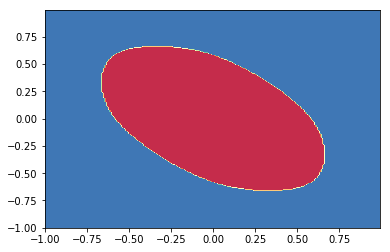

In [15]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 70)
        self.fc2 = nn.Linear(70, 70)
        self.fc3 = nn.Linear(70, 70)
        self.fc4 = nn.Linear(70, 70)
        self.fc5 = nn.Linear(70, 70)
        self.fc6 = nn.Linear(70, 70)
        self.fc7 = nn.Linear(70, 70)
        self.fc8 = nn.Linear(70, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.fc8(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    #plt.show()
    #plt.savefig(filename)
    #plt.close()

#%% read data

data = pd.read_csv('FeedForward_Data_ellipse.csv')
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()

nepochs = 20000
data, target = X, y

# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step() 
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
    if accuracy > 0.96:
        break
        
plot_decision_boundary(net, X, y)

#### 2.2.	File Feedforward_Data_hexa.csv contains 13312 two-dimensional data points (feature values located in columns A and B) and their respective binary label (labels located in column C).  Create and train a network that separates the data.  Report your best cross-entropy and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around.  Report the number of hidden layers, type of activation function and number of neurons per layer used.   [-1.0,1.0] x [-1.0,1.0].  (15 points).

Best cross entropy: 0.011

Best accuracy value: 0.997

Number of hidden layers: 7

Type of activation function: Linear

number of neurons per layer used: 50

/Users/jungmin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6334953904151917
Training accuracy is  0.940575463902036
Epoch  10 Loss  0.5601906776428223
Training accuracy is  0.940575463902036
Epoch  20 Loss  0.47978219389915466
Training accuracy is  0.940575463902036
Epoch  30 Loss  0.29575586318969727
Training accuracy is  0.940575463902036
Epoch  40 Loss  0.2484484612941742
Training accuracy is  0.940575463902036
Epoch  50 Loss  0.21491394937038422
Training accuracy is  0.940575463902036
Epoch  60 Loss  0.21079519391059875
Training accuracy is  0.940575463902036
Epoch  70 Loss  0.20637430250644684
Training accuracy is  0.940575463902036
Epoch  80 Loss  0.19976583123207092
Training accuracy is  0.940575463902036
Epoch  90 Loss  0.1926809847354889
Training accuracy is  0.940575463902036
Epoch  100 Loss  0.1843128204345703
Training accuracy is  0.940575463902036
Epoch  110 Loss  0.17401005327701569
Training accuracy is  0.940575463902036
Epoch  120 Loss  0.1614667922258377
Training accuracy is  0.940575463902036
Epoch  130 Loss 

Epoch  1060 Loss  0.03492460027337074
Training accuracy is  0.9860265945458643
Epoch  1070 Loss  0.033514998853206635
Training accuracy is  0.9839981969799414
Epoch  1080 Loss  0.03291120380163193
Training accuracy is  0.986327097888964
Epoch  1090 Loss  0.040331657975912094
Training accuracy is  0.9773119975959732
Epoch  1100 Loss  0.03658825904130936
Training accuracy is  0.9864773495605138
Epoch  1110 Loss  0.036197613924741745
Training accuracy is  0.9803170310269702
Epoch  1120 Loss  0.04973900690674782
Training accuracy is  0.9845240778303659
Epoch  1130 Loss  0.03295407071709633
Training accuracy is  0.9865524753962888
Epoch  1140 Loss  0.03675605729222298
Training accuracy is  0.9786642626399219
Epoch  1150 Loss  0.056809332221746445
Training accuracy is  0.9837728194726166
Epoch  1160 Loss  0.03933703154325485
Training accuracy is  0.9740815866576515
Epoch  1170 Loss  0.03547819331288338
Training accuracy is  0.9855758395312147
Epoch  1180 Loss  0.03268827870488167
Training ac

Epoch  2100 Loss  0.024816490709781647
Training accuracy is  0.9890316279768613
Epoch  2110 Loss  0.02629195898771286
Training accuracy is  0.9874539854255878
Epoch  2120 Loss  0.025795776396989822
Training accuracy is  0.9894072571557359
Epoch  2130 Loss  0.03799540922045708
Training accuracy is  0.9818195477424686
Epoch  2140 Loss  0.025614118203520775
Training accuracy is  0.9894823829915108
Epoch  2150 Loss  0.025005443021655083
Training accuracy is  0.9899331380061603
Epoch  2160 Loss  0.024719687178730965
Training accuracy is  0.9897077604988356
Epoch  2170 Loss  0.02627989836037159
Training accuracy is  0.989257005484186
Epoch  2180 Loss  0.02534947171807289
Training accuracy is  0.9899331380061603
Epoch  2190 Loss  0.03323736786842346
Training accuracy is  0.9855007136954399
Epoch  2200 Loss  0.035491958260536194
Training accuracy is  0.9836225678010668
Epoch  2210 Loss  0.026573989540338516
Training accuracy is  0.9858763428743145
Epoch  2220 Loss  0.02522253803908825
Training

Epoch  3140 Loss  0.028377892449498177
Training accuracy is  0.9893321313199609
Epoch  3150 Loss  0.02408057264983654
Training accuracy is  0.9901585155134851
Epoch  3160 Loss  0.026748014613986015
Training accuracy is  0.9866276012320637
Epoch  3170 Loss  0.023214023560285568
Training accuracy is  0.9908346480354594
Epoch  3180 Loss  0.03018411062657833
Training accuracy is  0.9870032304109383
Epoch  3190 Loss  0.026089372113347054
Training accuracy is  0.9869281045751634
Epoch  3200 Loss  0.024825967848300934
Training accuracy is  0.9891818796484111
Epoch  3210 Loss  0.030088601633906364
Training accuracy is  0.9885057471264368
Epoch  3220 Loss  0.025515438988804817
Training accuracy is  0.9885808729622118
Epoch  3230 Loss  0.02415747195482254
Training accuracy is  0.9887311246337616
Epoch  3240 Loss  0.05461592227220535
Training accuracy is  0.9900082638419352
Epoch  3250 Loss  0.08883858472108841
Training accuracy is  0.9722785665990534
Epoch  3260 Loss  0.0505482442677021
Training

Epoch  4180 Loss  0.032537683844566345
Training accuracy is  0.9856509653669897
Epoch  4190 Loss  0.02155385911464691
Training accuracy is  0.9902336413492601
Epoch  4200 Loss  0.028812186792492867
Training accuracy is  0.9900082638419352
Epoch  4210 Loss  0.02502656914293766
Training accuracy is  0.9909848997070092
Epoch  4220 Loss  0.023019781336188316
Training accuracy is  0.9906843963639096
Epoch  4230 Loss  0.03499525412917137
Training accuracy is  0.9819697994140185
Epoch  4240 Loss  0.027396157383918762
Training accuracy is  0.9878296146044625
Epoch  4250 Loss  0.02523569017648697
Training accuracy is  0.9900833896777101
Epoch  4260 Loss  0.028755560517311096
Training accuracy is  0.984373826158816
Epoch  4270 Loss  0.025684785097837448
Training accuracy is  0.9871534820824882
Epoch  4280 Loss  0.02543794922530651
Training accuracy is  0.9894823829915108
Epoch  4290 Loss  0.02076209895312786
Training accuracy is  0.9909097738712344
Epoch  4300 Loss  0.02503923885524273
Training 

Epoch  5220 Loss  0.02703239396214485
Training accuracy is  0.9869281045751634
Epoch  5230 Loss  0.020975111052393913
Training accuracy is  0.9912854030501089
Epoch  5240 Loss  0.030692914500832558
Training accuracy is  0.986251972053189
Epoch  5250 Loss  0.024747781455516815
Training accuracy is  0.9900833896777101
Epoch  5260 Loss  0.02071112021803856
Training accuracy is  0.9921117872436331
Epoch  5270 Loss  0.02778046950697899
Training accuracy is  0.9914356547216587
Epoch  5280 Loss  0.024744508787989616
Training accuracy is  0.9898580121703854
Epoch  5290 Loss  0.021522289142012596
Training accuracy is  0.9915107805574337
Epoch  5300 Loss  0.020160308107733727
Training accuracy is  0.9908346480354594
Epoch  5310 Loss  0.021576400846242905
Training accuracy is  0.9915107805574337
Epoch  5320 Loss  0.022256607189774513
Training accuracy is  0.9899331380061603
Epoch  5330 Loss  0.020083274692296982
Training accuracy is  0.991210277214334
Epoch  5340 Loss  0.019963683560490608
Traini

Epoch  6260 Loss  0.01795375905930996
Training accuracy is  0.9929381714371572
Epoch  6270 Loss  0.01973334699869156
Training accuracy is  0.991210277214334
Epoch  6280 Loss  0.03880027309060097
Training accuracy is  0.979490646833446
Epoch  6290 Loss  0.021986080333590508
Training accuracy is  0.9927879197656074
Epoch  6300 Loss  0.017364587634801865
Training accuracy is  0.9933889264518068
Epoch  6310 Loss  0.021661797538399696
Training accuracy is  0.9903838930208099
Epoch  6320 Loss  0.01733352057635784
Training accuracy is  0.9922620389151829
Epoch  6330 Loss  0.02065296098589897
Training accuracy is  0.9926376680940575
Epoch  6340 Loss  0.021059926599264145
Training accuracy is  0.9899331380061603
Epoch  6350 Loss  0.025987662374973297
Training accuracy is  0.9909848997070092
Epoch  6360 Loss  0.018148984760046005
Training accuracy is  0.9910600255427842
Epoch  6370 Loss  0.01906416192650795
Training accuracy is  0.9929381714371572
Epoch  6380 Loss  0.032049600034952164
Training 

Epoch  7300 Loss  0.01336634811013937
Training accuracy is  0.9956427015250545
Epoch  7310 Loss  0.013248204253613949
Training accuracy is  0.9957929531966043
Epoch  7320 Loss  0.025059010833501816
Training accuracy is  0.9786642626399219
Epoch  7330 Loss  0.017938395962119102
Training accuracy is  0.994215310645331
Epoch  7340 Loss  0.01605122908949852
Training accuracy is  0.9938396814664563
Epoch  7350 Loss  0.01397798303514719
Training accuracy is  0.9944406881526557
Epoch  7360 Loss  0.015217923559248447
Training accuracy is  0.9955675756892796
Epoch  7370 Loss  0.01539404597133398
Training accuracy is  0.9936894297949065
Epoch  7380 Loss  0.01570681296288967
Training accuracy is  0.9915859063932086
Epoch  7390 Loss  0.014217859134078026
Training accuracy is  0.99511682067463
Epoch  7400 Loss  0.0185158159583807
Training accuracy is  0.9919615355720832
Epoch  7410 Loss  0.013578959740698338
Training accuracy is  0.9960183307039291
Epoch  7420 Loss  0.03090345859527588
Training acc

Epoch  8330 Loss  0.030276035889983177
Training accuracy is  0.9797911501765457
Epoch  8340 Loss  0.0182131789624691
Training accuracy is  0.9903838930208099
Epoch  8350 Loss  0.015010900795459747
Training accuracy is  0.9954924498535046
Epoch  8360 Loss  0.01311680767685175
Training accuracy is  0.9937645556306814
Epoch  8370 Loss  0.015486226417124271
Training accuracy is  0.9962437082112539
Epoch  8380 Loss  0.01149218250066042
Training accuracy is  0.9947411914957554
Epoch  8390 Loss  0.012111927382647991
Training accuracy is  0.9955675756892796
Epoch  8400 Loss  0.02641999162733555
Training accuracy is  0.9846743295019157
Epoch  8410 Loss  0.01573779620230198
Training accuracy is  0.9909097738712344
Epoch  8420 Loss  0.015405365265905857
Training accuracy is  0.9945158139884306
Epoch  8430 Loss  0.011928548105061054
Training accuracy is  0.9948163173315303
Epoch  8440 Loss  0.02845548279583454
Training accuracy is  0.9912854030501089
Epoch  8450 Loss  0.011388160288333893
Training

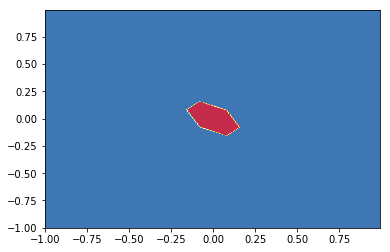

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 50)
        self.fc6 = nn.Linear(50, 50)
        self.fc7 = nn.Linear(50, 50)
        self.fc8 = nn.Linear(50, 50)
        self.fc9 = nn.Linear(50, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return F.log_softmax(x)


#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

#%% read data

data = pd.read_csv('FeedForward_Data_hexa.csv')
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)


#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.Adam(net.parameters())# lr=learning_rate, momentum=0.9)

# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
    if accuracy > 0.997:
        break

#%%  plot outputs
plot_decision_boundary(net, X, y)

#### 2.3 File Feedforward_Data_star.csv contains 13312 two-dimensional data points (feature values located in columns A and B) and their respective binary label (labels located in column C).  Create and train a network that separates the data.  Report your best cross-entropy and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around.  Report the number of hidden layers, type of activation function and number of neurons per layer used.   [-1.0,1.0] x [-1.0,1.0].  (10 points).

Best cross-entropy: 0.13

Best accuracy value: 0.949

Number of hidden layers: 6

Type of activation function: Linear

Number of neurons per layer used: 70

/Users/jungmin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6769603490829468
Training accuracy is  0.7930283224400871
Epoch  10 Loss  0.5980677008628845
Training accuracy is  0.7930283224400871
Epoch  20 Loss  0.5290388464927673
Training accuracy is  0.7930283224400871
Epoch  30 Loss  0.5108305811882019
Training accuracy is  0.7930283224400871
Epoch  40 Loss  0.510145902633667
Training accuracy is  0.7930283224400871
Epoch  50 Loss  0.5105681419372559
Training accuracy is  0.7930283224400871
Epoch  60 Loss  0.5101805925369263
Training accuracy is  0.7930283224400871
Epoch  70 Loss  0.5098347663879395
Training accuracy is  0.7930283224400871
Epoch  80 Loss  0.5097181797027588
Training accuracy is  0.7930283224400871
Epoch  90 Loss  0.5096856355667114
Training accuracy is  0.7930283224400871
Epoch  100 Loss  0.5096631646156311
Training accuracy is  0.7930283224400871
Epoch  110 Loss  0.5096365213394165
Training accuracy is  0.7930283224400871
Epoch  120 Loss  0.5096092224121094
Training accuracy is  0.7930283224400871
Epoch  130 

Epoch  1070 Loss  0.23277324438095093
Training accuracy is  0.8706333107955826
Epoch  1080 Loss  0.23229895532131195
Training accuracy is  0.8705581849598076
Epoch  1090 Loss  0.23186138272285461
Training accuracy is  0.8703328074524829
Epoch  1100 Loss  0.23145748674869537
Training accuracy is  0.8704830591240328
Epoch  1110 Loss  0.2310691475868225
Training accuracy is  0.8705581849598076
Epoch  1120 Loss  0.23071415722370148
Training accuracy is  0.8708586883029074
Epoch  1130 Loss  0.23040850460529327
Training accuracy is  0.8706333107955826
Epoch  1140 Loss  0.23013386130332947
Training accuracy is  0.8705581849598076
Epoch  1150 Loss  0.22988110780715942
Training accuracy is  0.8704830591240328
Epoch  1160 Loss  0.22965452075004578
Training accuracy is  0.8704830591240328
Epoch  1170 Loss  0.22944505512714386
Training accuracy is  0.8704830591240328
Epoch  1180 Loss  0.2292507290840149
Training accuracy is  0.8704079332882578
Epoch  1190 Loss  0.22907041013240814
Training accurac

Epoch  2120 Loss  0.2176651507616043
Training accuracy is  0.8756667417925025
Epoch  2130 Loss  0.21749639511108398
Training accuracy is  0.8755916159567275
Epoch  2140 Loss  0.21732652187347412
Training accuracy is  0.8756667417925025
Epoch  2150 Loss  0.2171531319618225
Training accuracy is  0.8758921192998272
Epoch  2160 Loss  0.21697764098644257
Training accuracy is  0.876042370971377
Epoch  2170 Loss  0.21679888665676117
Training accuracy is  0.8764931259860266
Epoch  2180 Loss  0.216617614030838
Training accuracy is  0.8768687551649013
Epoch  2190 Loss  0.21643269062042236
Training accuracy is  0.8771692585080009
Epoch  2200 Loss  0.21624454855918884
Training accuracy is  0.8774697618511006
Epoch  2210 Loss  0.21605335175991058
Training accuracy is  0.8775448876868756
Epoch  2220 Loss  0.21585838496685028
Training accuracy is  0.8775448876868756
Epoch  2230 Loss  0.21566016972064972
Training accuracy is  0.8774697618511006
Epoch  2240 Loss  0.21545842289924622
Training accuracy i

Epoch  3170 Loss  0.2061011642217636
Training accuracy is  0.8921944256629855
Epoch  3180 Loss  0.2057255655527115
Training accuracy is  0.893621816542709
Epoch  3190 Loss  0.20306865870952606
Training accuracy is  0.8726617083615055
Epoch  3200 Loss  0.2104777693748474
Training accuracy is  0.8938471940500338
Epoch  3210 Loss  0.20609773695468903
Training accuracy is  0.8761926226429269
Epoch  3220 Loss  0.2023521363735199
Training accuracy is  0.8825783186837953
Epoch  3230 Loss  0.23214581608772278
Training accuracy is  0.8520021035234017
Epoch  3240 Loss  0.21033063530921936
Training accuracy is  0.8938471940500338
Epoch  3250 Loss  0.20975729823112488
Training accuracy is  0.8721358275110811
Epoch  3260 Loss  0.20142951607704163
Training accuracy is  0.8916685448125611
Epoch  3270 Loss  0.21669714152812958
Training accuracy is  0.8937720682142589
Epoch  3280 Loss  0.2062632143497467
Training accuracy is  0.8794230335812486
Epoch  3290 Loss  0.20640712976455688
Training accuracy is

Epoch  4220 Loss  0.20261256396770477
Training accuracy is  0.8895650214108632
Epoch  4230 Loss  0.1899256706237793
Training accuracy is  0.883930583727744
Epoch  4240 Loss  0.18817035853862762
Training accuracy is  0.8992562542258282
Epoch  4250 Loss  0.1864091157913208
Training accuracy is  0.893621816542709
Epoch  4260 Loss  0.18842045962810516
Training accuracy is  0.8987303733754038
Epoch  4270 Loss  0.19450554251670837
Training accuracy is  0.8792727819096987
Epoch  4280 Loss  0.18779315054416656
Training accuracy is  0.8994065058973781
Epoch  4290 Loss  0.18893301486968994
Training accuracy is  0.8834798287130944
Epoch  4300 Loss  0.18861569464206696
Training accuracy is  0.8994065058973781
Epoch  4310 Loss  0.18775032460689545
Training accuracy is  0.8996318834047029
Epoch  4320 Loss  0.18330168724060059
Training accuracy is  0.9009090226128765
Epoch  4330 Loss  0.20400302112102509
Training accuracy is  0.8568101570129968
Epoch  4340 Loss  0.1875477433204651
Training accuracy i

Epoch  5270 Loss  0.1733500361442566
Training accuracy is  0.9127037788295395
Epoch  5280 Loss  0.17527785897254944
Training accuracy is  0.888738637217339
Epoch  5290 Loss  0.17005908489227295
Training accuracy is  0.9148824280670123
Epoch  5300 Loss  0.18279096484184265
Training accuracy is  0.9075200961610698
Epoch  5310 Loss  0.16532954573631287
Training accuracy is  0.914206295545038
Epoch  5320 Loss  0.2469220906496048
Training accuracy is  0.8515513485087521
Epoch  5330 Loss  0.16790571808815002
Training accuracy is  0.8961760949590564
Epoch  5340 Loss  0.1752777248620987
Training accuracy is  0.9113515137855909
Epoch  5350 Loss  0.169338196516037
Training accuracy is  0.9098489970700924
Epoch  5360 Loss  0.1908949911594391
Training accuracy is  0.8851325971001427
Epoch  5370 Loss  0.17502108216285706
Training accuracy is  0.9118022688002404
Epoch  5380 Loss  0.16479460895061493
Training accuracy is  0.9146570505596875
Epoch  5390 Loss  0.19518506526947021
Training accuracy is  

Epoch  6320 Loss  0.15539729595184326
Training accuracy is  0.9275786943129742
Epoch  6330 Loss  0.17180085182189941
Training accuracy is  0.9226955149876043
Epoch  6340 Loss  0.1572665423154831
Training accuracy is  0.9181879648411089
Epoch  6350 Loss  0.17329473793506622
Training accuracy is  0.8740139734054542
Epoch  6360 Loss  0.15837563574314117
Training accuracy is  0.916084441439411
Epoch  6370 Loss  0.1543692648410797
Training accuracy is  0.919014349034633
Epoch  6380 Loss  0.16928865015506744
Training accuracy is  0.9060175794455714
Epoch  6390 Loss  0.17662952840328217
Training accuracy is  0.8895650214108632
Epoch  6400 Loss  0.16052941977977753
Training accuracy is  0.9178874614980091
Epoch  6410 Loss  0.1593092381954193
Training accuracy is  0.9177372098264593
Epoch  6420 Loss  0.1610579937696457
Training accuracy is  0.9208173690932312
Epoch  6430 Loss  0.1735907644033432
Training accuracy is  0.9101495004131921
Epoch  6440 Loss  0.1570427417755127
Training accuracy is  

Epoch  7370 Loss  0.15259066224098206
Training accuracy is  0.9178874614980091
Epoch  7380 Loss  0.1549108326435089
Training accuracy is  0.9249492900608519
Epoch  7390 Loss  0.14842933416366577
Training accuracy is  0.9241229058673278
Epoch  7400 Loss  0.15950477123260498
Training accuracy is  0.9115017654571407
Epoch  7410 Loss  0.16436238586902618
Training accuracy is  0.9067688378033205
Epoch  7420 Loss  0.15667782723903656
Training accuracy is  0.9181879648411089
Epoch  7430 Loss  0.1467505693435669
Training accuracy is  0.9208173690932312
Epoch  7440 Loss  0.18052241206169128
Training accuracy is  0.9135301630230637
Epoch  7450 Loss  0.1537809520959854
Training accuracy is  0.9252497934039516
Epoch  7460 Loss  0.16339696943759918
Training accuracy is  0.915107805574337
Epoch  7470 Loss  0.1484648585319519
Training accuracy is  0.927879197656074
Epoch  7480 Loss  0.1752883791923523
Training accuracy is  0.9178874614980091
Epoch  7490 Loss  0.15151439607143402
Training accuracy is 

Epoch  8420 Loss  0.1592872440814972
Training accuracy is  0.9112763879498159
Epoch  8430 Loss  0.1524454951286316
Training accuracy is  0.933588761174968
Epoch  8440 Loss  0.15007281303405762
Training accuracy is  0.9188640973630832
Epoch  8450 Loss  0.14531457424163818
Training accuracy is  0.9217940049583052
Epoch  8460 Loss  0.14114297926425934
Training accuracy is  0.9214935016152055
Epoch  8470 Loss  0.17442677915096283
Training accuracy is  0.9130042821726392
Epoch  8480 Loss  0.1465124487876892
Training accuracy is  0.9292314627000225
Epoch  8490 Loss  0.15258026123046875
Training accuracy is  0.9165351964540606
Epoch  8500 Loss  0.14660273492336273
Training accuracy is  0.9298324693862219
Epoch  8510 Loss  0.1438256800174713
Training accuracy is  0.9211178724363308
Epoch  8520 Loss  0.1607639640569687
Training accuracy is  0.9193148523777327
Epoch  8530 Loss  0.1449897587299347
Training accuracy is  0.9262264292690257
Epoch  8540 Loss  0.144584059715271
Training accuracy is  0

Epoch  9470 Loss  0.14517483115196228
Training accuracy is  0.9409510930809105
Epoch  9480 Loss  0.14022600650787354
Training accuracy is  0.9241980317031027
Epoch  9490 Loss  0.14803557097911835
Training accuracy is  0.9193899782135077
Epoch  9500 Loss  0.15015928447246552
Training accuracy is  0.9198407332281572
Epoch  9510 Loss  0.138881653547287
Training accuracy is  0.9361430395913155
Epoch  9520 Loss  0.15095245838165283
Training accuracy is  0.9372699271279393
Epoch  9530 Loss  0.1405220627784729
Training accuracy is  0.921944256629855
Epoch  9540 Loss  0.15402023494243622
Training accuracy is  0.9168356997971603
Epoch  9550 Loss  0.14509837329387665
Training accuracy is  0.9216437532867553
Epoch  9560 Loss  0.1405191570520401
Training accuracy is  0.9211178724363308
Epoch  9570 Loss  0.13831423223018646
Training accuracy is  0.92675231011945
Epoch  9580 Loss  0.14493080973625183
Training accuracy is  0.9157839380963113
Epoch  9590 Loss  0.14728830754756927
Training accuracy is 

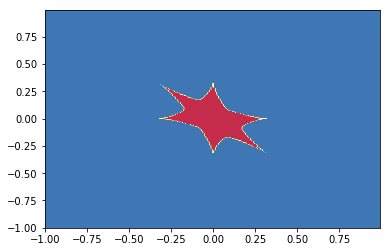

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 70)
        self.fc2 = nn.Linear(70, 70)
        self.fc3 = nn.Linear(70, 70)
        self.fc4 = nn.Linear(70, 70)
        self.fc5 = nn.Linear(70, 70)
        self.fc6 = nn.Linear(70, 70)
        self.fc7 = nn.Linear(70, 70)
        self.fc8 = nn.Linear(70, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.fc8(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function      
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

#%% read data
data = pd.read_csv('FeedForward_Data_star.csv')
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()

nepochs = 20000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
    if accuracy > 0.949:
        break

#%%  plot outputs
plot_decision_boundary(net, X, y)